# Principal Components Analysis (PCA)

## PCA functions

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
    
def ml_pca(X, y, n_comp, svd_sol='auto', standard_scaler=True):
    # Standardizing the features
    if (standard_scaler):
        X_standard = StandardScaler().fit_transform(X)
    else:
        X_standard = X
    # Using PCA as a dimensionality reduction transform
    pca = PCA(n_components=n_comp, svd_solver=svd_sol)
    X_pca = pca.fit_transform(X_standard)
    # The transformed data has been reduced to dimension
    X_new = pca.inverse_transform(X_pca)
    
    return pca, X_pca, X_new

## Plots

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Two projected, multiple colors
def plt_pca(projected, y):

    plt.figure()

    plt.scatter(projected[:, 0], projected[:, 1],
                c=y, edgecolor='none', alpha=0.5, 
                cmap=plt.cm.get_cmap('Spectral_r', len(y))
               )
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();
    plt.title('PCA')

    plt.show()

# Choosing the number of components
def plt_pca_n_comp(pca, y):
    
    plt.figure()
    plt.clf()
    plt.plot(pca.explained_variance_, linewidth=2, color='purple')
    plt.grid(True)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained variance')
    
    plt.show()

## Example

In [7]:
import pandas as pd
import numpy as np

# Display a pandas dataframe format using print()
pd.options.display.float_format = '{:,.3f}'.format
# 
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

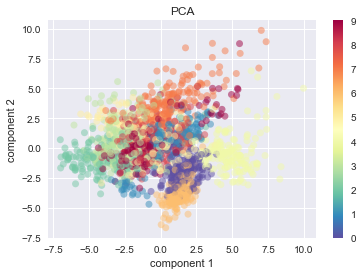

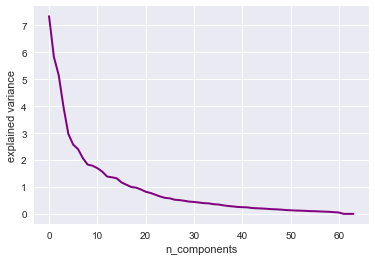

In [9]:
# With standard scaler
model_pca, pcaX, newX = ml_pca(X, y, min(X.shape))

plt_pca(pcaX, y)
plt_pca_n_comp(model_pca, y)

In [32]:
print('Eigenvalue:\n', model_pca.explained_variance_)
print('\nProportion:\n', model_pca.explained_variance_ratio_)
print('\nCumulative:\n', model_pca.explained_variance_ratio_.cumsum())

Eigenvalue:
 [7.345 5.835 5.154 3.966 2.966 2.572 2.406 2.069 1.830 1.790 1.698 1.573
 1.389 1.359 1.322 1.168 1.084 1.000 0.974 0.909 0.823 0.776 0.712 0.646
 0.595 0.577 0.527 0.511 0.487 0.456 0.443 0.422 0.399 0.391 0.361 0.349
 0.320 0.294 0.277 0.258 0.248 0.242 0.218 0.208 0.200 0.190 0.176 0.169
 0.158 0.143 0.133 0.124 0.119 0.112 0.103 0.098 0.090 0.082 0.076 0.063
 0.050 0.000 0.000 0.000]

Proportion:
 [0.120 0.096 0.084 0.065 0.049 0.042 0.039 0.034 0.030 0.029 0.028 0.026
 0.023 0.022 0.022 0.019 0.018 0.016 0.016 0.015 0.013 0.013 0.012 0.011
 0.010 0.009 0.009 0.008 0.008 0.007 0.007 0.007 0.007 0.006 0.006 0.006
 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001
 0.001 0.000 0.000 0.000]

Cumulative:
 [0.120 0.216 0.300 0.365 0.414 0.456 0.496 0.529 0.559 0.589 0.617 0.642
 0.665 0.687 0.709 0.728 0.746 0.762 0.778 0.793 0.807 0.819 0.831 0.842
 0.851 0.861 0.869 0.878 0.886 

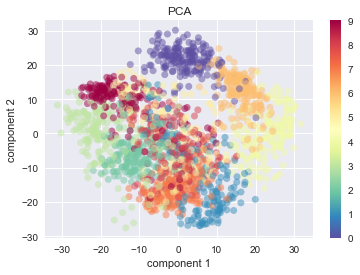

<Figure size 432x288 with 0 Axes>

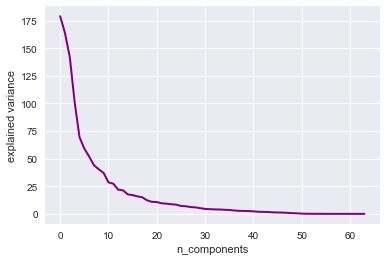

In [36]:
# Without standard scaler
model_pca, pcaX, newX = ml_pca(X, y, min(X.shape), standard_scaler=False)

plt_pca(pcaX, y)
plt_pca_n_comp(model_pca, y)

In [34]:
print('Eigenvalue:\n', model_pca.explained_variance_)
print('\nProportion:\n', model_pca.explained_variance_ratio_)
print('\nCumulative:\n', model_pca.explained_variance_ratio_.cumsum())

Eigenvalue:
 [179.007 163.718 141.788 101.100 69.513 59.109 51.885 44.015 40.311 37.012
 28.519 27.321 21.901 21.324 17.637 16.947 15.851 15.004 12.234 10.887
 10.694 9.583 9.226 8.690 8.366 7.166 6.920 6.193 5.885 5.156 4.491 4.247
 4.047 3.943 3.706 3.532 3.085 2.738 2.672 2.542 2.283 1.907 1.817 1.690
 1.402 1.292 1.159 0.931 0.670 0.486 0.252 0.099 0.063 0.061 0.040 0.015
 0.008 0.004 0.001 0.001 0.000 0.000 0.000 0.000]

Proportion:
 [0.149 0.136 0.118 0.084 0.058 0.049 0.043 0.037 0.034 0.031 0.024 0.023
 0.018 0.018 0.015 0.014 0.013 0.012 0.010 0.009 0.009 0.008 0.008 0.007
 0.007 0.006 0.006 0.005 0.005 0.004 0.004 0.004 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001
 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000]

Cumulative:
 [0.149 0.285 0.403 0.487 0.545 0.594 0.637 0.674 0.707 0.738 0.762 0.785
 0.803 0.821 0.835 0.849 0.863 0.875 0.885 0.894 0.903 0.911 0.919 0.926
 0.933